# Comparing Circular coordinates and PCA
In this note, we will compare the circular coordiantes and the PCA as dimension reduction methods. In particular, we will see with an example where the PCA breaks down the topological features while the circular coordinates preserve the topological features.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Python_code import examples as eg
import numpy as np
from numpy import *
import dionysus

## Generate Data
The data is a uniform distribution on a loop that wraps around the cube $[-1,1]\times[-1,1]\times[-1,1]$.

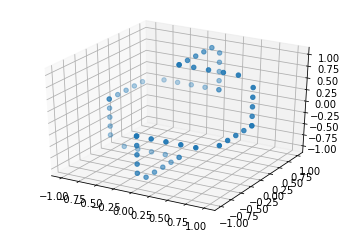

In [3]:
from mpl_toolkits.mplot3d import Axes3D
m = 5
n = 12 * m

X1 = np.zeros((m, 3))
X1[:,0] = 1
X1[:,2] = np.array([x for x in range(m)]) / m

X2 = np.zeros((m, 3))
X2[:,2] = 1
X2[:,0] = np.array([x for x in range(m)]) / m

X3 = np.zeros((m, 3))
X3[:,2] = 1
X3[:,1] = np.array([x for x in range(m)]) / m

X4 = np.zeros((m, 3))
X4[:,1] = 1
X4[:,2] = np.array([x for x in range(m)]) / m

X5 = np.zeros((m, 3))
X5[:,1] = 1
X5[:,0] = - np.array([x for x in range(m)]) / m

X6 = np.zeros((m, 3))
X6[:,0] = -1
X6[:,1] = np.array([x for x in range(m)]) / m

X0 = np.vstack((X1, X2, X3, X4, X5, X6))
X = np.vstack((X0, -X0))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = X[:,0], ys = X[:,1], zs = X[:,2])

As expected, the $1$-dimensional persistent cohomology contains one cohomological feature.

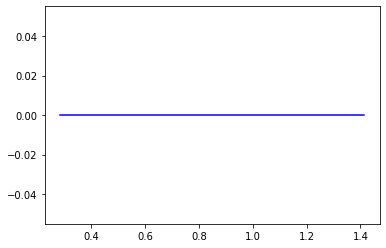

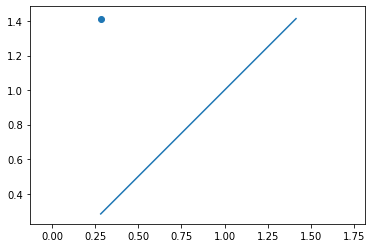

In [4]:
prime = 23 #choose the prime base for the coefficient field that we use to construct the persistence cohomology.
vr = dionysus.fill_rips(X, 2, 4.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology based on the chosen parameters.
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using␣ the designated coefficient field and complex.
dionysus.plot.plot_bars(dgms[1], show=True)
dionysus.plot.plot_diagram(dgms[1], show=True)
#dionysus.plot.plot_diagram(dgms[0], show=True)
#Plot the barcode and diagrams using matplotlib incarnation within Dionysus2. This mechanism is different in Dionysus.

## Computing circular coordinates
Then, we compute the circular coordinates from the longest cohomological feature in the persistent cohomology.

In [5]:
threshold = 1
bars = [bar for bar in dgms[1] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=1.
cocycles = [cp.cocycle(bar.data) for bar in bars]
chosen_cocycle= cocycles[0]
chosen_bar= bars[0]

In [6]:
vr_8 = dionysus.Filtration([s for s in vr if s.data <= max([bar.birth for bar in bars])])
coords = dionysus.smooth(vr_8, chosen_cocycle, prime)

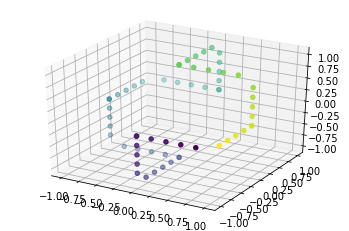

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = X[:,0], ys = X[:,1], zs = X[:,2], c = coords)

## Dimension reduction using circular coordinates
Now, we use dimension reduction using circular coordinates. For this, we interpret the circular coordinates values as in $\mathbb{S}^{1} \subset \mathbb{R}^{2}$. Hence if we use $k$ circular coordinate values, we get $2k$ dimensional reduction. For this example, we use $k=1$.

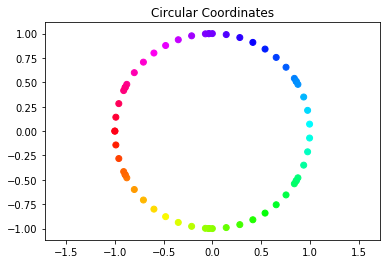

In [8]:
X_cc = numpy.zeros((size(coords), 2))
X_cc[:, 0] = cos(2 * pi * numpy.matrix(coords) / (max(coords) - min(coords)))
X_cc[:, 1] = sin(2 * pi * numpy.matrix(coords) / (max(coords) - min(coords)))

scatter(X_cc[:, 0],X_cc[:, 1], c = coords, cmap = "hsv")
plt.axis('equal')
plt.title('Circular Coordinates')
plt.show()

And the persistent cohomology is as below. As you can see, the $1$-dimensional persistent cohomology contains one cohomological feature, which is the same with the $1$-dimensional persistent cohomology of the original data. Hence the topological structure of the original data is preserved.

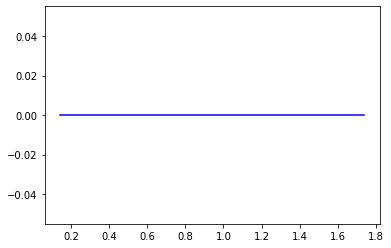

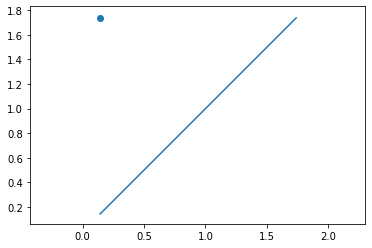

In [9]:
prime = 23 #choose the prime base for the coefficient field that we use to construct the persistence cohomology.
vr_cc = dionysus.fill_rips(X_cc, 2, 4.) #Vietoris-Rips complex
cp_cc = dionysus.cohomology_persistence(vr_cc, prime, True) #Create the persistent cohomology based on the chosen parameters.
dgms_cc = dionysus.init_diagrams(cp_cc, vr_cc) #Calculate the persistent diagram using␣ the designated coefficient field and complex.
dionysus.plot.plot_bars(dgms_cc[1], show=True)
dionysus.plot.plot_diagram(dgms_cc[1], show=True)
#dionysus.plot.plot_diagram(dgms[0], show=True)
#Plot the barcode and diagrams using matplotlib incarnation within Dionysus2. This mechanism is different in Dionysus.

## Dimension reduction using PCA
Now, we use dimension reduction using PCA. To compare with the circular coordinates, we choose the projection dimension to be $2$. From the plot, we can see the the $1$-dimensional cohomological structure is collapsed.

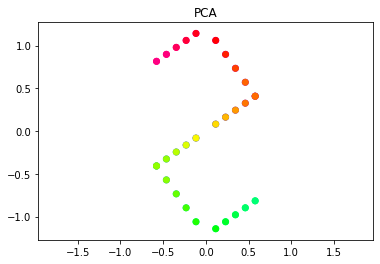

In [10]:
from Python_code import PCAtool as PCAtool
X_pca = PCAtool.pca(X, K=2)

scatter(X_pca[:, 0],X_pca[:, 1], c = coords, cmap = "hsv")
plt.axis('equal')
plt.title('PCA')
plt.show()

And the persistent cohomology is as below. As you can see, the $1$-dimensional persistent cohomology contains no feature.Hence the topological structure of the original data is not preserved.

In [11]:
prime = 23 #choose the prime base for the coefficient field that we use to construct the persistence cohomology.
vr_pca = dionysus.fill_rips(X_pca, 2, 4.) #Vietoris-Rips complex
cp_pca = dionysus.cohomology_persistence(vr_pca, prime, True) #Create the persistent cohomology based on the chosen parameters.
dgms_pca = dionysus.init_diagrams(cp_pca, vr_pca) #Calculate the persistent diagram using␣ the designated coefficient field and complex.
dgms_pca[1]

Diagram with 0 points